### Manifold: t-SNE

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [30]:
sns.set(font_scale=0.8)

--------------

In [38]:
data = pd.read_csv('../datareader/score/score.csv')
data = data.set_index('Protein')
ndf = data.copy(deep =True)

In [39]:
ndf.head()

,ARR,CHD,CM,CVA,IHD,VD
Protein,,,,,,
alpha-1-antitrypsin,0.009000,0.120724,0.036423,0.047402,0.103137,0.023655
mothers_against_decapentaplegic_homolog_4,0.005316,0.080604,0.056011,0.010512,0.039842,0.000000
vascular_endothelial_growth_factor_b,0.000000,0.006129,0.073377,0.028607,0.121075,0.000000
"indoleamine_2,3-dioxygenase_1",0.000000,0.000000,0.000000,0.000000,0.034477,0.000000
thyroxine-binding_globulin,0.000000,0.036206,0.020516,0.006959,0.048815,0.024457


-------------

In [40]:
tdata =ndf.copy(deep =True)

In [43]:
clrs = []
index = list(tdata.index)
for item in index:
        idata = tdata.loc[item,:]
        m = max(idata)
        if  idata[0] == m:
            grp = 'mediumslateblue' 
        elif idata[1] == m:
            grp = 'deepskyblue'
        elif  idata[2] == m:
            grp = 'firebrick'
        elif idata[3] == m:
            grp = 'navy'
        elif idata[4] == m:
            grp = 'green'
        elif idata[5] == m:
            grp = 'darkgoldenrod'
        clrs.append(grp)

In [44]:
from sklearn.manifold import TSNE

### 2D

In [45]:
data = np.array(tdata)
X_embedded2d = TSNE(n_components=2).fit_transform(data)
X_embedded2d.shape

(2702, 2)

In [46]:
X_embedded2d[0:5]

array([[-25.754416 ,  -7.965259 ],
       [-26.620293 ,  -5.1239824],
       [ 27.849804 ,  -4.344018 ],
       [-58.07679  , -14.141396 ],
       [ -4.6017346, -19.903543 ]], dtype=float32)

In [48]:
X2d =[]
Y2d = []
for i in range(2702):
    X2d.append(X_embedded2d[i][0])
    Y2d.append(X_embedded2d[i][1])

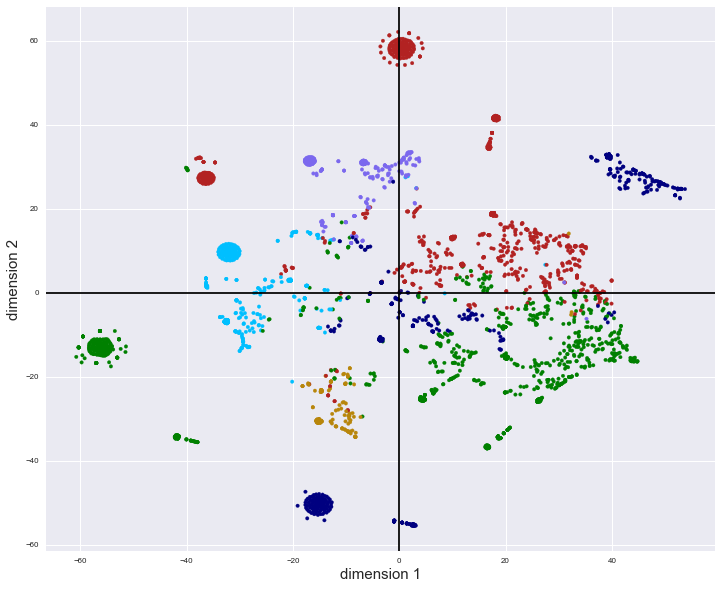

In [50]:
plt.figure(figsize = [12,10])
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel("dimension 1", fontsize=15)
plt.ylabel("dimension 2", fontsize=15)
plt.scatter(X2d,Y2d,color = clrs, marker ='.')
plt.savefig('tSNE2d.png')

### 3D

In [51]:
X_embedded3d = TSNE(n_components=3).fit_transform(tdata)
X_embedded3d.shape

(2702, 3)

In [52]:
X_embedded3d[0:5]

array([[ 9.6248448e-01, -9.0759039e+00,  4.6115828e+00],
       [ 2.0610862e+00, -7.7535987e+00,  5.7227635e+00],
       [-1.3132879e+00, -4.8665481e+00, -7.0070448e+00],
       [-6.3637619e+00,  8.7666006e+00,  1.3431536e+01],
       [-1.0757800e-02, -4.0151596e+00,  5.0205660e+00]], dtype=float32)

In [57]:
X3d =[]
Y3d =[]
Z3d= []
for i in range(2702):
    X3d.append(X_embedded3d[i][0])
    Y3d.append(X_embedded3d[i][1])
    Z3d.append(X_embedded3d[i][2])

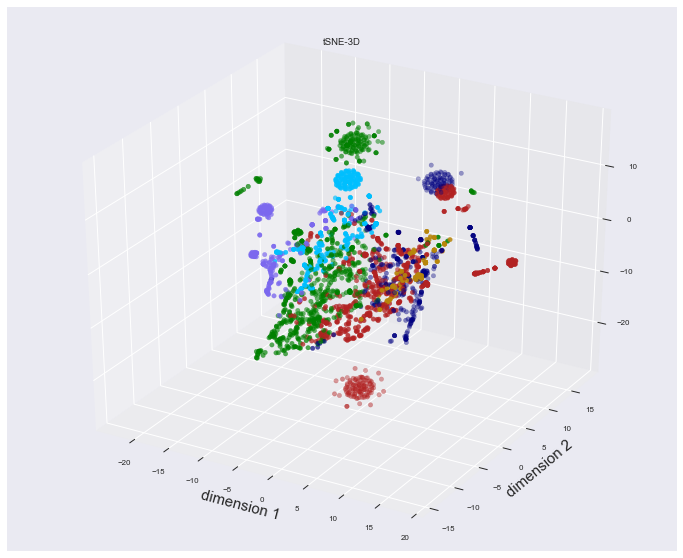

In [59]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 100

fig = plt.figure(figsize = [12,10])
ax = fig.gca(projection='3d')
plt.title('tSNE-3D')

ax.scatter(X3d, Y3d, Z3d, label='tSNE', s=20, color=clrs)
plt.xlabel("dimension 1", fontsize=15)
plt.ylabel("dimension 2", fontsize=15)
plt.savefig('tSNE3d.png')

In [49]:
 TSNE(n_components=3).get_params()

{'angle': 0.5,
 'early_exaggeration': 12.0,
 'init': 'random',
 'learning_rate': 200.0,
 'method': 'barnes_hut',
 'metric': 'euclidean',
 'min_grad_norm': 1e-07,
 'n_components': 3,
 'n_iter': 1000,
 'n_iter_without_progress': 300,
 'perplexity': 30.0,
 'random_state': None,
 'verbose': 0}